In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# analysis folder version  
analysis_version = '011'

## Output Path 

In [3]:
out_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis',
                        analysis_version, 
                        '004_demographics_feasibility')

if not os.path.exists(out_path): 
    os.makedirs(out_path)

# Functions 

In [4]:
# split dataframe into healthy controls and participant swith MS 
# then select first visit date - maybe not baseline, but first visit with data in that dataset 

def split_MS_HC_first_visit(df, visit_date_col): 
    df = df.copy()
    df['visit_date_video'] = pd.to_datetime(df[visit_date_col])
    df['bw_id'] = df['bw_id'].str.strip()

    print('total unique bw_ids in df')
    print(df['bw_id'].nunique())
    print('--------------') 

    # drop full duplicate rows 
    df = df.drop_duplicates(keep='first')

    # drop dupllicated bw_id and visit_date - ex: same fw and pws 
    df = df.drop_duplicates(subset=['bw_id', visit_date_col], keep='first')

    # first visit - keep the earliest date for each ID 
    df_first_visit = (
        df.sort_values(by=['bw_id', visit_date_col])
        .groupby('bw_id')
        .first()
        .reset_index()
    )
    

    # check if any duplicates 
    duplicates = df_first_visit['bw_id'].duplicated().sum()
    
    print('any duplicate bw_ids in first visit df?') 
    print(duplicates)
    print('--------------')

    print('df_first_visit demographic diagnosis counts') 
    print(df_first_visit['demographic_diagnosis'].value_counts())
    print('--------------') 
    
    MS_1_df = df_first_visit.loc[df_first_visit['demographic_diagnosis'] == 'MS']
    HC_1_df = df_first_visit.loc[df_first_visit['demographic_diagnosis'] == 'HC'] 

    return MS_1_df, HC_1_df

In [5]:
def plot_histogram(df): 
    columns = ['demoEHR_DiseaseDuration','clean_Age',
               'clean_EDSS', 'clean_T25FW_Avg', 
              'tc_Examinee_Education']

    for index, current_col in enumerate(columns): 
        plt.hist(df[current_col])
        plt.title(current_col)
        plt.show()
        plt.close()

In [6]:
def demographic_summary(df): 
    # summary statistics for  cohort 
    if len(df) > 0: 
        # age 
        age_count = df['clean_Age'].count()
        age_mean = df['clean_Age'].mean()
        age_sd = df['clean_Age'].std()

        age_median = df['clean_Age'].median()
        age_iqr = df['clean_Age'].quantile(0.75) - df['clean_Age'].quantile(0.25)
        
        # sex 
        sex_count = df['clean_Sex'].count()
        sex_n = df['clean_Sex'].value_counts()
        sex_n_female = sex_n['Female']
        sex_freqs = df['clean_Sex'].value_counts(normalize=True) * 100
        sex_freq_female = sex_freqs['Female'] 
        
        # edss 
        edss_count = df['clean_EDSS'].count()
        edss_median = df['clean_EDSS'].median()
        print(edss_median)
        edss_median = round(edss_median * 2) / 2 
        print(edss_median)
        #calculate quantiles and map back to ordinal category 
        q1 = df['clean_EDSS'].quantile(0.25)
        print(q1)
        q1_ordinal = round(q1 * 2) / 2 
        print(q1_ordinal)
        q3 = df['clean_EDSS'].quantile(0.75)
        print(q3)
        q3_ordinal = round(q3 * 2) / 2
        print(q3_ordinal)
        edss_iqr = q3_ordinal - q1_ordinal
        print(edss_iqr)

        # t25fw 
        t25fw_count = df['clean_T25FW_Avg'].count()
        t25fw_mean= df['clean_T25FW_Avg'].mean()
        t25fw_sd = df['clean_T25FW_Avg'].std()
        
        t25fw_median= df['clean_T25FW_Avg'].median()
        t25fw_iqr = df['clean_T25FW_Avg'].quantile(0.75) - df['clean_T25FW_Avg'].quantile(0.25)

        #race 
        race_count = df['race_ethnicity_clean'].count()
        race_n = df['race_ethnicity_clean'].value_counts()
        race_freq = df['race_ethnicity_clean'].value_counts(normalize = True) * 100

        try:
            white_n = race_n['White Non Hispanic']
            white_freq = race_freq['White Non Hispanic']
        except KeyError:
            white_n = 0
            white_freq = 0

        try: 
            black_n = race_n['Black Or African American']
            black_freq = race_freq['Black Or African American']
        except KeyError:
            black_n = 0
            black_freq = 0
        
        try: 
            asian_n = race_n['Asian']
            asian_freq = race_freq['Asian']
        except KeyError:
            asian_n = 0
            asian_freq = 0

#        try: 
#             ai_an_n = race_n['American Indian Or Alaska Native']
#             ai_an_freq = race_freq['American Indian Or Alaska Native']
#         except KeyError:
#             ai_an_n = 0
#             ai_an_freq = 0

#         try: 
#             opi_n = race_n['Other Pacific Islander']
#             opi_freq = race_freq['Other Pacific Islander']
#         except KeyError:
#             opi_n = 0
#             opi_freq = 0
             
        try: 
            hispanic_n = race_n['Hispanic or Latino']
            hispanic_freq = race_freq['Hispanic or Latino']
        except KeyError: 
            hispanic_n = 0
            hispanic_freq = 0

        try: 
            decl_n = race_n['Other/Unknown/Declined']
            decl_freq = race_freq['Other/Unknown/Declined']
        except KeyError: 
            decl_n = 0
            decl_freq = 0

        # disease duration 
        duration_count = df['demoEHR_DiseaseDuration'].count()
        duration_mean = df['demoEHR_DiseaseDuration'].mean()
        duration_sd = df['demoEHR_DiseaseDuration'].std()

        duration_median = df['demoEHR_DiseaseDuration'].median()
        duration_iqr = df['demoEHR_DiseaseDuration'].quantile(0.75) - df['demoEHR_DiseaseDuration'].quantile(0.25)

        # MS subtype 
        #'bingoEHR_DX_MS DX'
        ms_dx_count = df['ms_dx_condensed'].count()
        ms_dx_n = df['ms_dx_condensed'].value_counts()
        ms_dx_freq = df['ms_dx_condensed'].value_counts(normalize = True) * 100

        try:
            rrms_n = ms_dx_n['RRMS']
            rrms_freq = ms_dx_freq['RRMS']
        except KeyError:
            rrms_n = 0
            rrms_freq = 0

        
        try:
            pms_n = ms_dx_n['Progressive MS']
            pms_freq = ms_dx_freq['Progressive MS']
        except KeyError:
            pms_n = 0
            pms_freq = 0

#        try: 
#            spms_n = ms_dx_n['SPMS (Secondary-progressive Multiple Sclerosis)']
#            spms_freq = ms_dx_freq['SPMS (Secondary-progressive Multiple Sclerosis)']
#        except KeyError:
#            spms_n = 0
#            spms_freq = 0

#        try: 
#            ppms_n = ms_dx_n['PPMS (Primary-progressive Multiple Sclerosis)']
#            ppms_freq = ms_dx_freq['PPMS (Primary-progressive Multiple Sclerosis)']
#        except KeyError:
#            ppms_n = 0
#            ppms_freq = 0

#        try: 
#            prms_n = ms_dx_n['PRMS (Progressive-relapsing Multiple Sclerosis)']
#            prms_freq = ms_dx_freq['PRMS (Progressive-relapsing Multiple Sclerosis)']
#        except KeyError:
#            prms_n = 0
#            prms_freq = 0 

        try: 
            sns_n = ms_dx_n['MS, Subtype Not Specified']
            sns_freq = ms_dx_freq['MS, Subtype Not Specified']
        except KeyError:
            sns_n = 0
            sns_freq = 0

#        try: 
#            pend_n = ms_dx_n['pending']
#            pend_freq = ms_dx_freq['pending']
#        except KeyError:
#            pend_n = 0
#            pend_freq = 0

#        try: 
#            abn_n = ms_dx_n['abnormal MRI']
#            abn_freq = ms_dx_freq['abnormal MRI']
#        except KeyError:
#            abn_n = 0
#            abn_freq = 0

        # first visit - visit type 
        visit_count = df['redcap_event_name'].count()
        visit_n = df['redcap_event_name'].value_counts()
        visit_freq = df['redcap_event_name'].value_counts(normalize = True) * 100

        #baseline visits 
        base_n = visit_n['Brainwalk: Baseline visit (Arm 1: Baseline visit)']
        base_freq = visit_freq['Brainwalk: Baseline visit (Arm 1: Baseline visit)']

        # year 1 
        try: 
            yr2_n = visit_n['Year 2 Visit (Arm 1: Baseline visit)']
            yr2_freq = visit_freq['Year 2 Visit (Arm 1: Baseline visit)']
        except KeyError:
            yr2_n = 0
            yr2_freq = 0

        # year 1 
        try: 
            yr3_n = visit_n['Year 3 Visit (Arm 1: Baseline visit)']
            yr3_freq = visit_freq['Year 3 Visit (Arm 1: Baseline visit)']
        except KeyError:
            yr3_n = 0
            yr3_freq = 0

        # education 
        edu_count = df['tc_Examinee_Education'].count()
        edu_mean = df['tc_Examinee_Education'].mean()
        edu_sd = df['tc_Examinee_Education'].std()

        edu_median = df['tc_Examinee_Education'].median()
        edu_iqr = df['tc_Examinee_Education'].quantile(0.75) - df['tc_Examinee_Education'].quantile(0.25)
        
        
        # summary data 
        summary_data = {'Metric': ['N Participants', 
                                      'Age (Years), Mean (SD)',
                                       'Age (Years), Median (IQR)',
                                      'Sex (Female), N (%)',
                                      'Race/Ethnicity, N (%)',
                                      'White Non Hispanic',
                                      'Hispanic or Latino',
                                      'Asian',
                                      'Black Or African American',
                                      'Other/Unknown/Declined',
                                      'Disease Duration (Years), Mean (SD)',
                                      'Disease Duration (Years), Median (IQR)',
                                      'MS Subtype, N (%)',
                                      'Relapsing-onset',
                                      'Progressive',
                                      'Subtype Not Specified',
                                       'EDSS, Median (IQR)', 
                                      'T25FW (Seconds), Mean (SD)',
                                      'T25FW (Seconds), Median (IQR)', 
                                      'Visit Type, N (%)',
                                      'Baseline', 
                                      'Year 2', 
                                      'Year 3',
                                      'Education (Years), Mean (SD)', 
                                      'Education (Years), Median (IQR)'],
                         'Statistic': [df['bw_id'].nunique(),
                                       f"{age_mean:.2f} ({age_sd:.2f})",  # Mean (SD)
                                       f"{age_median: .2f} ({age_iqr:.2f})",
                                       f"{sex_n_female} ({sex_freq_female:.0f}%)",
                                       np.nan, 
                                       f"{white_n} ({white_freq:.0f}%)",
                                       f"{hispanic_n} ({hispanic_freq:.0f}%)",
                                       f"{asian_n} ({asian_freq:.0f}%)",
                                       f"{black_n} ({black_freq:.0f}%)",
                                       f"{decl_n} ({decl_freq:.0f}%)",
                                       f"{duration_mean:.2f} ({duration_sd:.2f})",  # Mean (SD)
                                        f"{duration_median:.2f} ({duration_iqr:.2f})",
                                       np.nan,
                                       f"{rrms_n} ({rrms_freq:.0f}%)",
                                       f"{pms_n} ({pms_freq:.0f}%)",
                                       f"{sns_n} ({sns_freq:.0f}%)", 
                                       f"{edss_median:.1f} ({edss_iqr:.1f})", 
                                       f"{t25fw_mean:.2f} ({t25fw_sd:.2f})",
                                       f"{t25fw_median:.2f} ({t25fw_iqr:.2f})",
                                       np.nan, 
                                       f"{base_n} ({base_freq:.0f}%)",
                                       f"{yr2_n} ({yr2_freq:.0f}%)",
                                       f"{yr3_n} ({yr3_freq:.0f}%)",
                                       f"{edu_mean:.2f} ({edu_sd:.2f})",
                                       f"{edu_median:.2f} ({edu_iqr:.2f})"
                                      ]
                       }

        demographics_summary_df = pd.DataFrame(summary_data)


        # counts of participants with demographic data 
        n_data = {'Metric': ['N', 
                             'n with age data',
                             'n with sex data',
                             'n with edss data',
                             'n with t25fw data',
                             'n with demoEHR_REC_2 data',
                             'n with duration data',
                             'n with ms subtype data',
                            'n with education data'],
                         'Statistic': [df['bw_id'].nunique(),
                                       age_count, 
                                       sex_count, 
                                       edss_count,
                                       t25fw_count, 
                                       race_count,
                                       duration_count,
                                       ms_dx_count,
                                       edu_count
                                       ]}

        n_data_df = pd.DataFrame(n_data) 

    else: 
        print('no participants') 
        demographics_summary_df = pd.DataFrame()
        n_data_df = pd.DataFrame()

    return demographics_summary_df, n_data_df

# Demographic Groups 

For each group 
- pulling demographic data from first brainwalk visit if participant has multiple visits 
- save .csv file for each group
- save summary table as .csv file 

Zeno 
1. All participants with videos: MS + HC
2. All participants with included videos: MS + HC
3. Participants with included PWS videos: MS + HC – is there a diff between groups?
4. Participants with included FW videos: MS + HC – is there a diff between groups?

Home Videos 
1. all BW participants with MS (TBD, maybe not all approached) 
2. All BW participants consented to home vids
3. All BW participants who sent home vids
4. All BW participants who sent usable/included home vids  

# All BW participants w demographic data and walking tasks 
- Just MS participants
- Need to have all demographic data -drop if missing any 'cols_to_check'

In [7]:
# All Bw Data  
bw_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis',
                       analysis_version, 
                       '000_merged_cleaned_data\mergedCols_2025_04_17_BrainWalk_AllData_Long_MM.csv')

bw_df = pd.read_csv(bw_path, index_col = 0)

In [8]:
# All BW Dataset 
bw_ms_first_visit, test_HC = split_MS_HC_first_visit(bw_df, visit_date_col = 'visit_date')
bw_ms_dem, bw_ms_counts = demographic_summary(bw_ms_first_visit)
bw_ms_first_visit.to_csv(os.path.join(out_path, 'bw_ms_first_visit_all.csv')) 
bw_ms_dem.to_csv(os.path.join(out_path, 'bw_ms_dem_all.csv'))
bw_ms_dem

total unique bw_ids in df
491
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS                                                                                 312
HC                                                                                  56
PD                                                                                  19
Mild TBI                                                                            18
bvFTD                                                                               15
nfvPPA                                                                              10
CBS                                                                                  5
Mild complicated TBI                                                                 3
svPPA                                                                                3
Pending                                          

,Metric,Statistic
0,N Participants,312
1,"Age (Years), Mean (SD)",53.01 (13.17)
2,"Age (Years), Median (IQR)",53.80 (20.10)
3,"Sex (Female), N (%)",215 (70%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,212 (68%)
6,Hispanic or Latino,24 (8%)
7,Asian,14 (4%)
8,Black Or African American,14 (4%)
9,Other/Unknown/Declined,48 (15%)


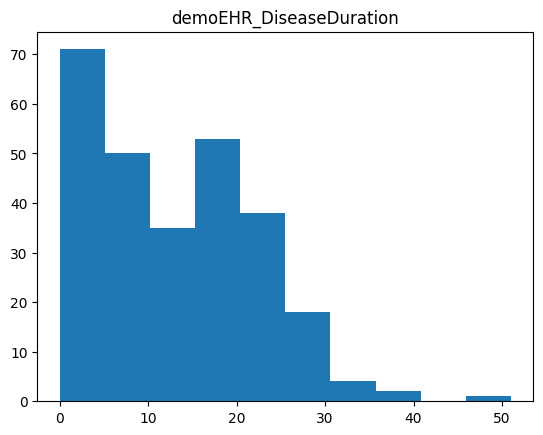

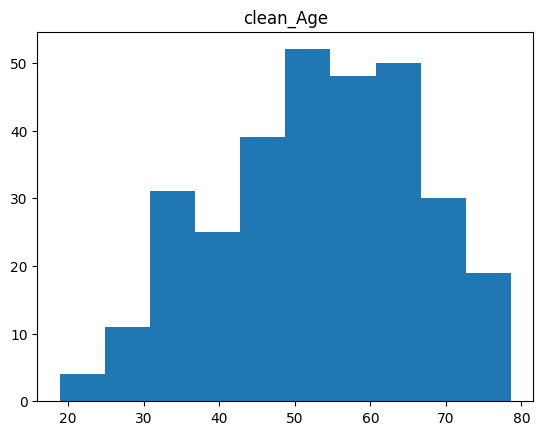

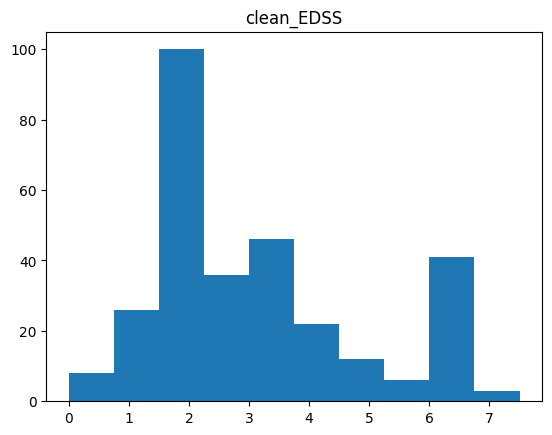

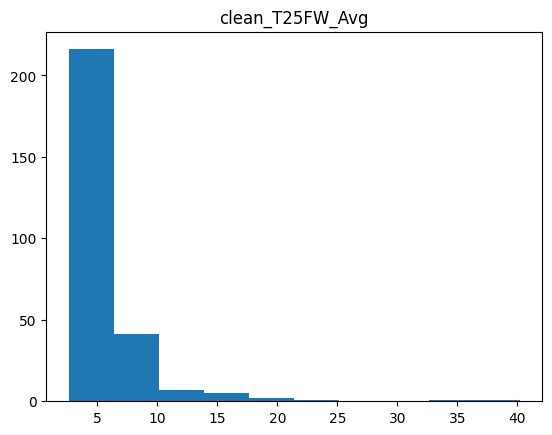

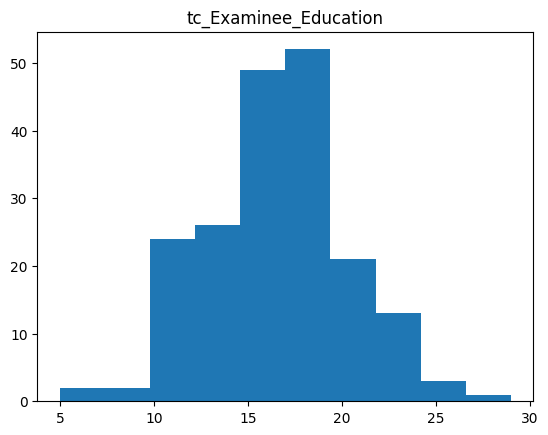

In [9]:
# histograms 
plot_histogram(bw_ms_first_visit)

In [10]:
# Clean BW data - has all field used in analysis wtihing range
bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                            analysis_version, 
                            '000_merged_cleaned_data\clean_mergedCols_2025_04_17_BrainWalk_AllData_Long_MM.csv')

bw_clean_df = pd.read_csv(bw_clean_path, index_col = 0)

In [11]:
# Clean BW Dataset 
clean_bw_ms_first_visit, test_HC = split_MS_HC_first_visit(bw_clean_df, visit_date_col = 'visit_date')
clean_bw_ms_dem, clean_bw_ms_counts = demographic_summary(clean_bw_ms_first_visit)
clean_bw_ms_first_visit.to_csv(os.path.join(out_path, 'bw_ms_first_visit_clean.csv')) 
clean_bw_ms_dem.to_csv(os.path.join(out_path, 'bw_ms_dem_clean.csv'))
clean_bw_ms_dem

total unique bw_ids in df
176
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    176
Name: count, dtype: int64
--------------
2.5
2.5
1.5
1.5
4.0
4.0
2.5


,Metric,Statistic
0,N Participants,176
1,"Age (Years), Mean (SD)",49.12 (13.31)
2,"Age (Years), Median (IQR)",48.60 (22.55)
3,"Sex (Female), N (%)",126 (72%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,117 (66%)
6,Hispanic or Latino,19 (11%)
7,Asian,12 (7%)
8,Black Or African American,9 (5%)
9,Other/Unknown/Declined,19 (11%)


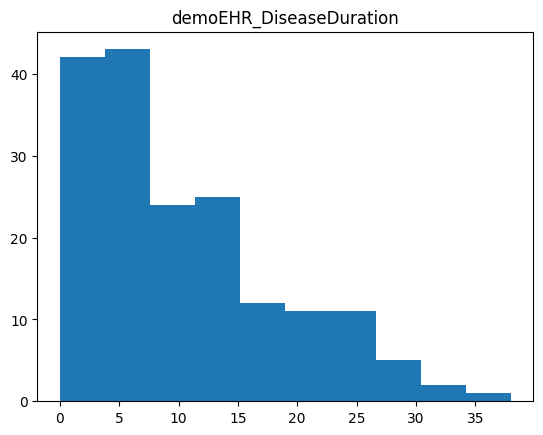

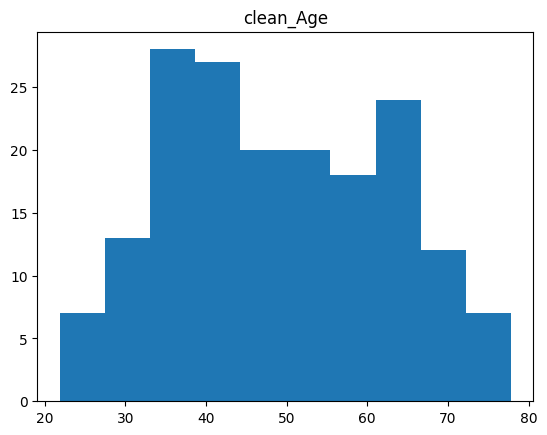

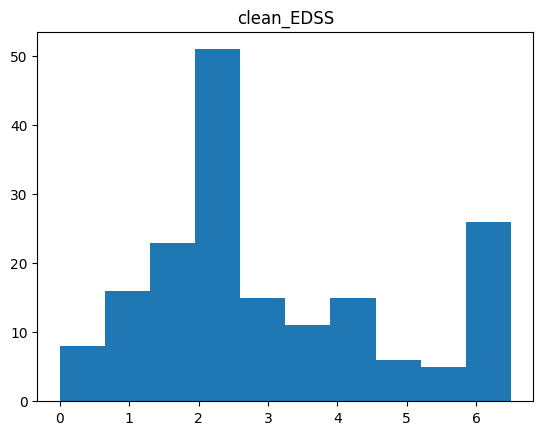

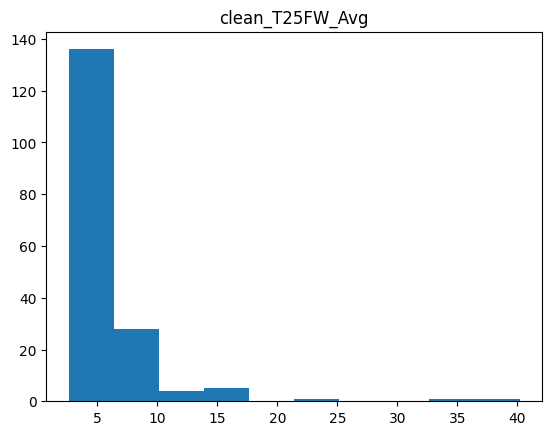

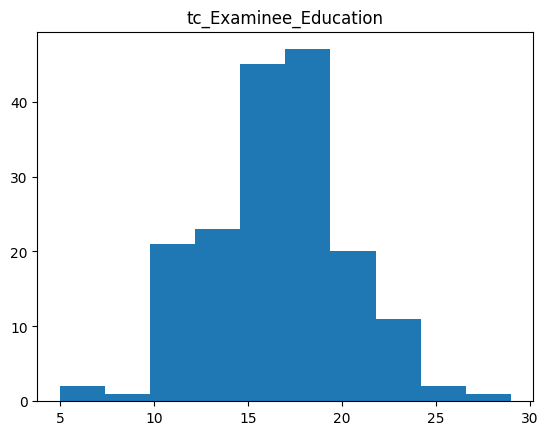

In [12]:
# histograms 
plot_histogram(clean_bw_ms_first_visit)

# Zeno Videos 
Videos paired with BW dataset 

### PWS 

In [13]:
# clean dataframes contain all videos processed with BW data  

# PWS 
zv_pws_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                    '000_merged_cleaned_data\zv_bw_merged_gait_vertical_PWS_1_clean.csv')
zv_pws_bw_clean_df = pd.read_csv(zv_pws_bw_clean_path, index_col = 0)
print(zv_pws_bw_clean_df['demographic_diagnosis'].value_counts())

demographic_diagnosis
MS    178
Name: count, dtype: int64


In [14]:
# PWS Demographics - All Videos in clean dataset 
clean_zv_pws_first_visit, test_HC = split_MS_HC_first_visit(zv_pws_bw_clean_df, visit_date_col = 'visit_date_video')
clean_zv_pws_dem, clean_zv_pws_counts = demographic_summary(clean_zv_pws_first_visit)
clean_zv_pws_first_visit.to_csv(os.path.join(out_path, 'clean_zv_pws_first_visit.csv')) 
clean_zv_pws_dem.to_csv(os.path.join(out_path, 'clean_zv_pws_dem.csv'))

total unique bw_ids in df
125
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    125
Name: count, dtype: int64
--------------
2.5
2.5
1.5
1.5
4.0
4.0
2.5


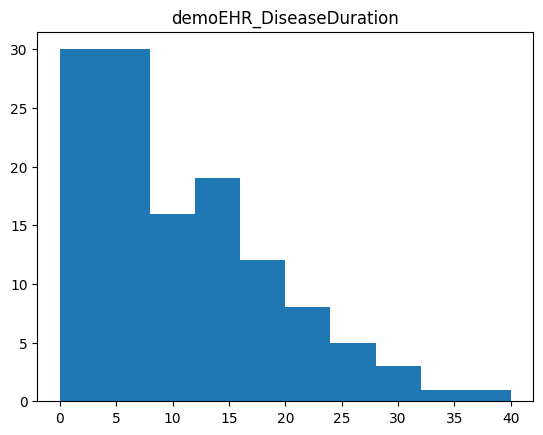

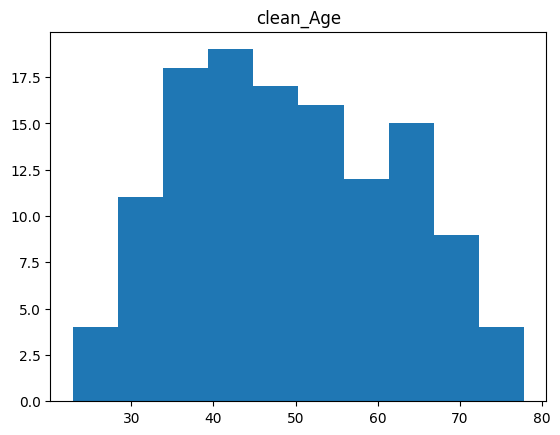

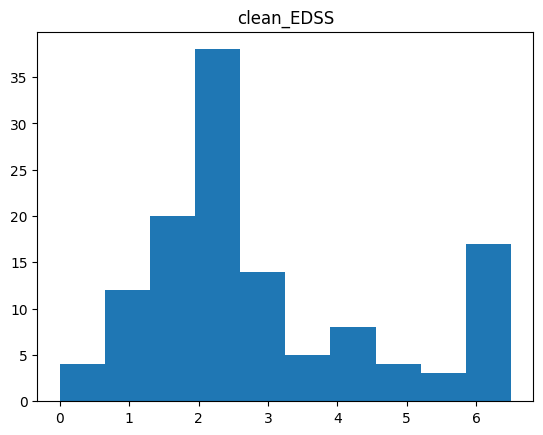

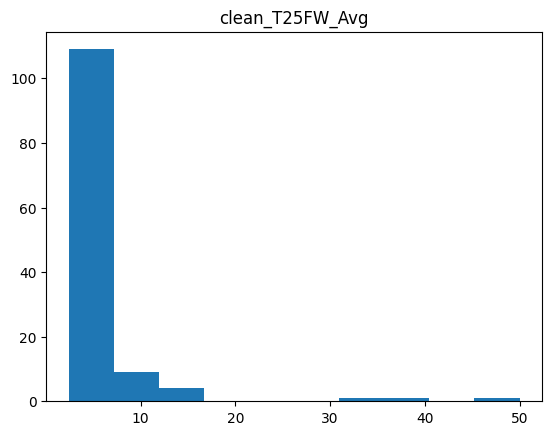

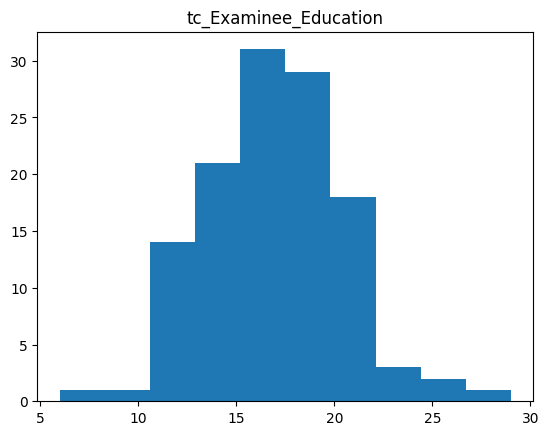

In [15]:
# histograms 
plot_histogram(clean_zv_pws_first_visit)

In [16]:
clean_zv_pws_dem

,Metric,Statistic
0,N Participants,125
1,"Age (Years), Mean (SD)",49.06 (12.73)
2,"Age (Years), Median (IQR)",48.60 (20.00)
3,"Sex (Female), N (%)",90 (72%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,86 (69%)
6,Hispanic or Latino,12 (10%)
7,Asian,10 (8%)
8,Black Or African American,6 (5%)
9,Other/Unknown/Declined,11 (9%)


### Fast walk 

In [17]:
# FW 
zv_fw_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                   '000_merged_cleaned_data\zv_bw_merged_gait_vertical_FW_1_clean.csv') 
zv_fw_bw_clean_df = pd.read_csv(zv_fw_bw_clean_path, index_col = 0) 
print(zv_fw_bw_clean_df['demographic_diagnosis'].value_counts())

demographic_diagnosis
MS    176
Name: count, dtype: int64


In [18]:
# FW Demographics - All Videos in clean dataset 
clean_zv_fw_first_visit, test_HC = split_MS_HC_first_visit(zv_fw_bw_clean_df, visit_date_col = 'visit_date_video')
clean_zv_fw_dem, clean_zv_fw_counts = demographic_summary(clean_zv_fw_first_visit)
clean_zv_fw_first_visit.to_csv(os.path.join(out_path, 'clean_zv_fw_first_visit.csv')) 
clean_zv_fw_dem.to_csv(os.path.join(out_path, 'clean_zv_fw_dem.csv'))

total unique bw_ids in df
125
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    125
Name: count, dtype: int64
--------------
2.5
2.5
1.5
1.5
4.0
4.0
2.5


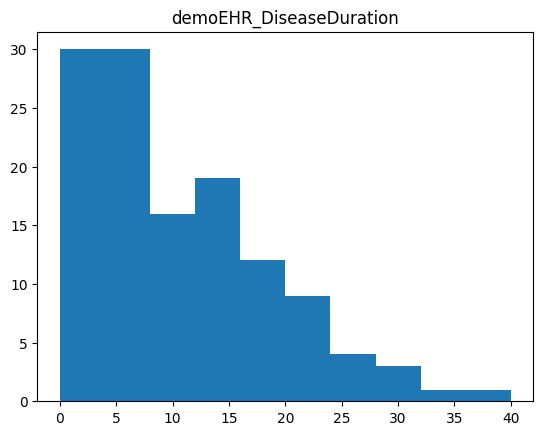

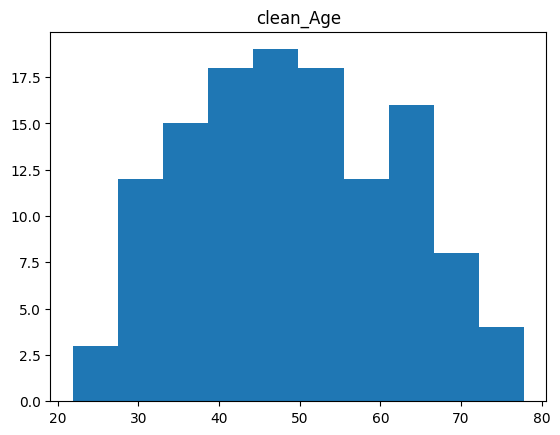

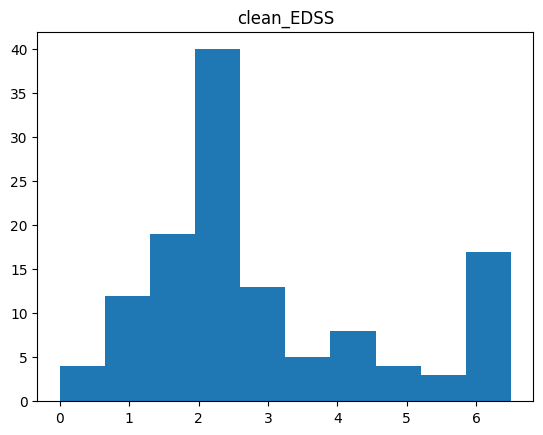

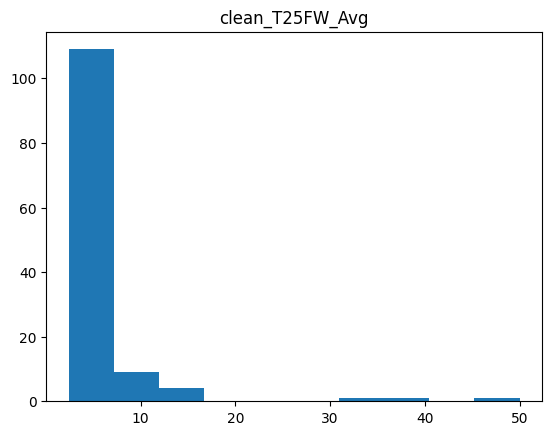

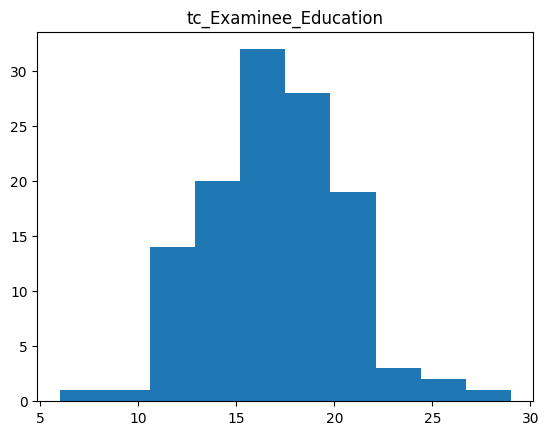

In [19]:
# histograms 
plot_histogram(clean_zv_fw_first_visit)

In [20]:
clean_zv_fw_dem

,Metric,Statistic
0,N Participants,125
1,"Age (Years), Mean (SD)",49.04 (12.75)
2,"Age (Years), Median (IQR)",48.60 (20.00)
3,"Sex (Female), N (%)",90 (72%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,86 (69%)
6,Hispanic or Latino,12 (10%)
7,Asian,10 (8%)
8,Black Or African American,6 (5%)
9,Other/Unknown/Declined,11 (9%)


### PWS and FW merged 

In [21]:
pws_fw_clean_df = pd.concat([zv_pws_bw_clean_df, zv_fw_bw_clean_df]) 
pws_fw_clean_df['task_pose_zv'].value_counts()

task_pose_zv
gait_vertical_PWS_1    178
gait_vertical_FW_1     176
Name: count, dtype: int64

In [22]:
# PWS and FW Demographics - All Videos in clean dataset 
clean_pws_fw_first_visit, test_HC = split_MS_HC_first_visit(pws_fw_clean_df, visit_date_col = 'visit_date_video')
clean_pws_fw_dem, clean_pws_fw_counts = demographic_summary(clean_pws_fw_first_visit)
clean_pws_fw_first_visit.to_csv(os.path.join(out_path, 'clean_pws_fw_first_visit.csv')) 
clean_pws_fw_dem.to_csv(os.path.join(out_path, 'clean_pws_fw_dem.csv'))

total unique bw_ids in df
125
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    125
Name: count, dtype: int64
--------------
2.5
2.5
1.5
1.5
4.0
4.0
2.5


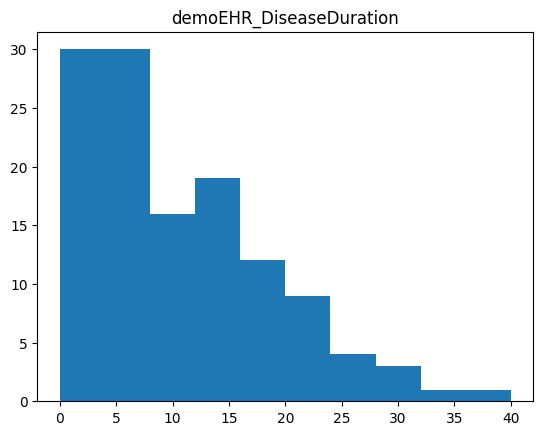

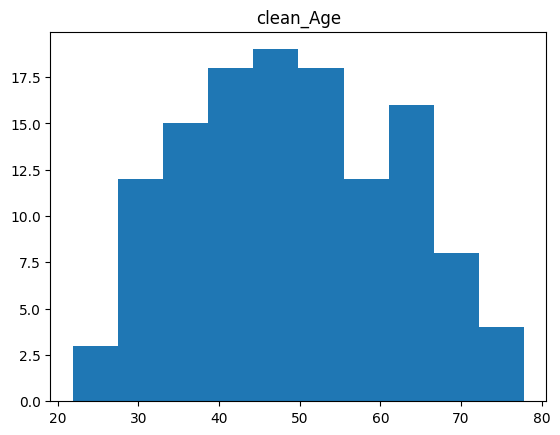

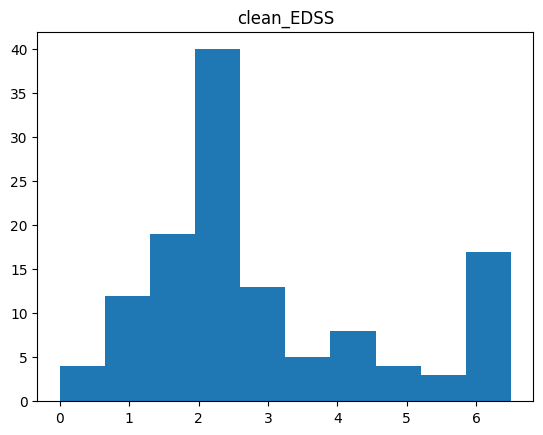

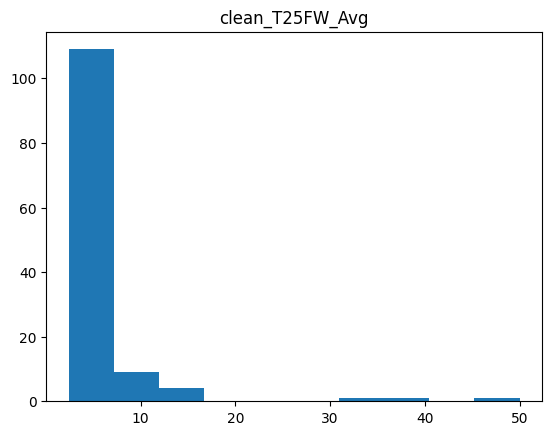

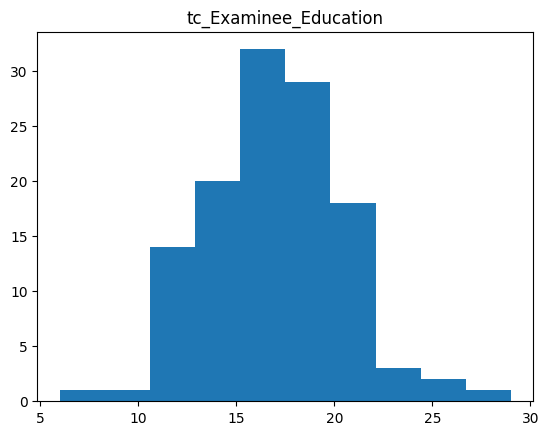

In [23]:
# histograms 
plot_histogram(clean_pws_fw_first_visit)

In [24]:
clean_pws_fw_dem

,Metric,Statistic
0,N Participants,125
1,"Age (Years), Mean (SD)",49.02 (12.74)
2,"Age (Years), Median (IQR)",48.60 (20.00)
3,"Sex (Female), N (%)",90 (72%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,86 (69%)
6,Hispanic or Latino,12 (10%)
7,Asian,10 (8%)
8,Black Or African American,6 (5%)
9,Other/Unknown/Declined,11 (9%)


# Home Videos  

## consent to home videos 

### All Participants who consented to home videos 
See old demographics table script

In [25]:
# REDCap report paths - participants consented to home vids
redcap_reports_path = r'C:\Users\mmccu\Box\Brainwalk\Home Video Walking\Megan Project\bw_data_and_code\home_video_feasibility\2025_04_28 RedCap Reports'
consent_base_v1_path = os.path.join(redcap_reports_path,
                                    'homevid_baseline_consent_v1.csv') 
consent_base_v2_path = os.path.join(redcap_reports_path,
                                    'homevid_baseline_consent_v2.csv') 
consent_y2_v1_path = os.path.join(redcap_reports_path,
                                    'homevid_year2_consent_v1.csv') 
consent_y2_v2_path = os.path.join(redcap_reports_path,
                                    'homevid_year2_consent_v2.csv') 
consent_y3_v1_path = os.path.join(redcap_reports_path,
                                  'homevid_year3_consent_v1.csv') 
consent_y3_v2_path = os.path.join(redcap_reports_path,
                                  'homevid_year3_consent_v2.csv')
consent_mm_manual_path = os.path.join(redcap_reports_path,
                                  'homevid_consents_manual.xlsx')

In [26]:
# participants consented to home vids - format and merge dataframes 
consent_base_v1_df = pd.read_csv(consent_base_v1_path) 
consent_base_v2_df = pd.read_csv(consent_base_v2_path)
consent_y2_v1_df = pd.read_csv(consent_y2_v1_path)
consent_y2_v2_df = pd.read_csv(consent_y2_v2_path)
consent_y3_v1_df = pd.read_csv(consent_y3_v1_path)
consent_y3_v2_df = pd.read_csv(consent_y3_v2_path) 
consent_manual_df = pd.read_excel(consent_mm_manual_path)

In [27]:
# format 
# add consent version column 
consent_base_v1_df['consent_version'] = 1
consent_y2_v1_df['consent_version'] = 1
consent_y3_v1_df['consent_version'] = 1

consent_base_v2_df['consent_version'] = 2
consent_y2_v2_df['consent_version'] = 2
consent_y3_v2_df['consent_version']= 2

consent_manual_df['consent_version'] = None

# rename all columns to v1 col names 
#record_id	redcap_event_name	bw_id	falls_visit_date	walking_consent_date	walking_consent_sig
consent_base_v1_df = consent_base_v1_df.rename(columns = {'falls_visit_date' : 'visit_date'}) 
consent_y2_v1_df = consent_y2_v1_df.rename(columns = {'falls_visit_date' : 'visit_date'})
consent_y3_v1_df = consent_y3_v1_df.rename(columns = {'falls_visit_date' : 'visit_date'})
consent_manual_df = consent_manual_df.rename(columns = {'falls_visit_date' : 'visit_date'})


consent_base_v2_df = consent_base_v2_df.rename(columns = {'falls_visit_date' : 'visit_date',
                                                          'walking_consent_date_v2' : 'walking_consent_date',
                                                          'walking_consent_sig_v2' : 'walking_consent_sig'}) 
consent_y2_v2_df = consent_y2_v2_df.rename(columns = {'falls_visit_date' : 'visit_date',
                                                      'walking_consent_date_v2' : 'walking_consent_date',
                                                      'walking_consent_sig_v2' : 'walking_consent_sig'}) 
consent_y3_v2_df = consent_y3_v2_df.rename(columns = {'falls_visit_date' : 'visit_date',
                                                      'walking_consent_date_v2' : 'walking_consent_date',
                                                      'walking_consent_sig_v2' : 'walking_consent_sig'})

# convert to date time 
consent_base_v1_df['visit_date'] = pd.to_datetime(consent_base_v1_df['visit_date'], errors = 'coerce')
consent_y2_v1_df['visit_date'] = pd.to_datetime(consent_y2_v1_df['visit_date'], errors = 'coerce')
consent_y3_v1_df['visit_date'] = pd.to_datetime(consent_y3_v1_df['visit_date'], errors = 'coerce')
consent_base_v2_df['visit_date'] = pd.to_datetime(consent_base_v2_df['visit_date'], errors = 'coerce')
consent_y2_v2_df['visit_date'] = pd.to_datetime(consent_y2_v2_df['visit_date'], errors = 'coerce')
consent_y3_v2_df['visit_date'] = pd.to_datetime(consent_y3_v2_df['visit_date'], errors = 'coerce')
consent_manual_df['visit_data'] = pd.to_datetime(consent_manual_df['visit_date'], errors = 'coerce')
# concatenate 
consent_all_df = pd.concat([consent_base_v1_df,
                            consent_base_v2_df,
                            consent_y2_v1_df,
                            consent_y2_v2_df,
                            consent_y3_v1_df,
                            consent_y3_v2_df, 
                           consent_manual_df])

In [28]:
# rename columns to help with merge 
consent_all_df = consent_all_df.rename(columns={'redcap_event_name': 'redcap_event_name_1'})

## Drop rows missing ID - error in report, duplicated with other row, maybe signed twice? 
#consent_all_df = consent_all_df.dropna(subset=['bw_id'])

## Drop rows if duplicate BW-ID and date combo - may have signed both version 1 and version 2
consent_all_df = consent_all_df.drop_duplicates(subset=['bw_id', 'visit_date'], keep='first')
consent_all_df.to_csv(os.path.join(out_path, 'home_video_consent_df_original.csv'))


In [29]:
# convert bw dates to date object 
bw_df['visit_date'] = pd.to_datetime(bw_df['visit_date'], errors = 'coerce')
bw_clean_df['visit_date'] = pd.to_datetime(bw_clean_df['visit_date'], errors = 'coerce')
consent_all_df['walking_consent_date'] = pd.to_datetime(consent_all_df['walking_consent_date'], errors = 'coerce')

In [30]:
# merge bw_df with consented 
consent_all_w_bw_df = consent_all_df.merge(right = bw_df, how = 'left', on = ['bw_id', 'visit_date'])
consent_all_w_bw_df.head()

# drop non MS (think one TBI by accident)
consent_all_w_bw_df = consent_all_w_bw_df.loc[consent_all_w_bw_df['demographic_diagnosis'] == 'MS']

consent_all_w_bw_df.to_csv(os.path.join(out_path, 'home_video_consent_df_merged_w_bw_all.csv'))

In [31]:
# number of participants who consented at one visit, vs at multiple visits 
print((consent_all_w_bw_df['bw_id'].value_counts() == 1).sum())
print(consent_all_w_bw_df['bw_id'][consent_all_w_bw_df['bw_id'].duplicated()].nunique())

65
8


In [32]:
# selecting first visist = someone who consented to home videos at at least one visit 
consent_first_visit, test_HC = split_MS_HC_first_visit(consent_all_w_bw_df, visit_date_col = 'visit_date')
consent_dem, consent_counts = demographic_summary(consent_first_visit)
consent_first_visit.to_csv(os.path.join(out_path, 'home_video_consent_first_visit_all.csv')) 
consent_dem.to_csv(os.path.join(out_path, 'home_video_consent_dem_all.csv'))
consent_dem

total unique bw_ids in df
73
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    73
Name: count, dtype: int64
--------------
3.0
3.0
2.0
2.0
4.0
4.0
2.0


,Metric,Statistic
0,N Participants,73
1,"Age (Years), Mean (SD)",49.47 (13.56)
2,"Age (Years), Median (IQR)",50.80 (25.30)
3,"Sex (Female), N (%)",55 (75%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,47 (64%)
6,Hispanic or Latino,6 (8%)
7,Asian,6 (8%)
8,Black Or African American,3 (4%)
9,Other/Unknown/Declined,11 (15%)


### Consent with BW data 
merge participants who have consented with clean BW data. Clean BW data only contains participants with full datasets (no missing assessments and EDSS and T25FW in range) 

In [33]:
# merge 
consent_clean_w_bw_df = consent_all_df.merge(right = bw_clean_df, how = 'left', on = ['bw_id', 'visit_date'])

# drop non MS (think one TBI by accident)
consent_clean_w_bw_df = consent_clean_w_bw_df.loc[consent_clean_w_bw_df['demographic_diagnosis'] == 'MS']

# drop if clean sex column is empty - means no bw data is available for this visit from the clean dataset 
consent_clean_w_bw_df = consent_clean_w_bw_df.dropna(subset = ['clean_Sex'])

consent_clean_w_bw_df.to_csv(os.path.join(out_path, 'home_video_consent_df_merged_w_bw_clean.csv'))

In [34]:
# selecting first visist = someone who consented to home videos at at least one visit 
consent_clean_first_visit, test_HC = split_MS_HC_first_visit(consent_clean_w_bw_df, visit_date_col = 'visit_date')
consent_clean_dem, consent_clean_counts = demographic_summary(consent_clean_first_visit)
consent_clean_first_visit.to_csv(os.path.join(out_path, 'home_video_consent_first_visit_clean.csv')) 
consent_clean_dem.to_csv(os.path.join(out_path, 'home_video_consent_dem_clean.csv'))
consent_clean_dem

total unique bw_ids in df
72
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    72
Name: count, dtype: int64
--------------
2.75
3.0
2.0
2.0
4.0
4.0
2.0


,Metric,Statistic
0,N Participants,72
1,"Age (Years), Mean (SD)",49.65 (13.57)
2,"Age (Years), Median (IQR)",50.80 (24.58)
3,"Sex (Female), N (%)",55 (76%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,46 (64%)
6,Hispanic or Latino,6 (8%)
7,Asian,6 (8%)
8,Black Or African American,3 (4%)
9,Other/Unknown/Declined,11 (15%)


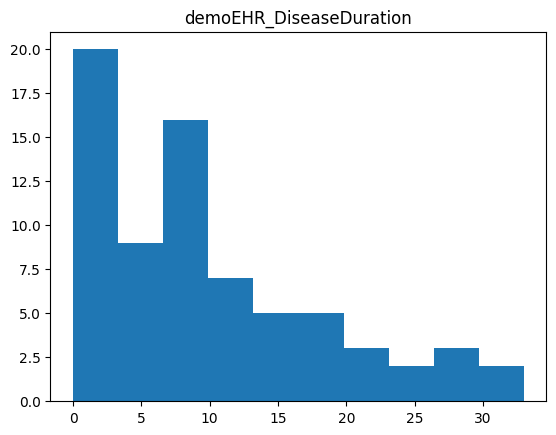

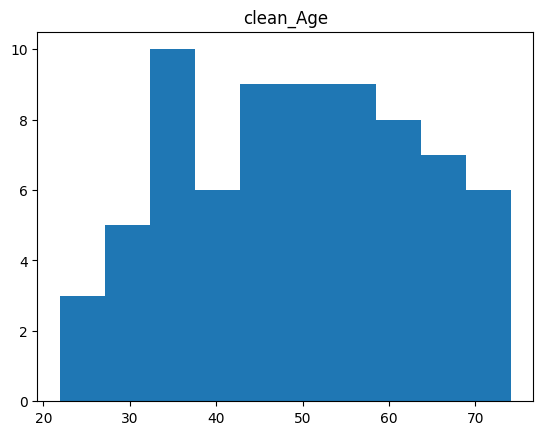

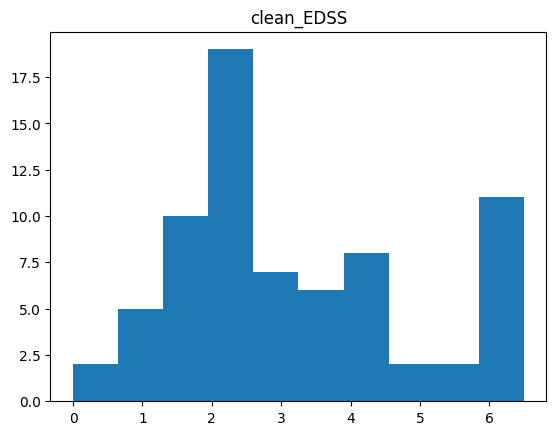

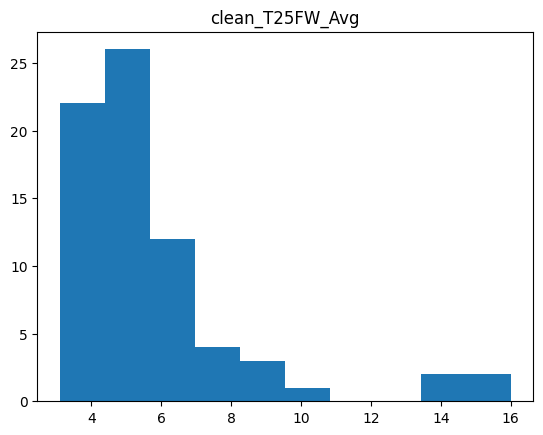

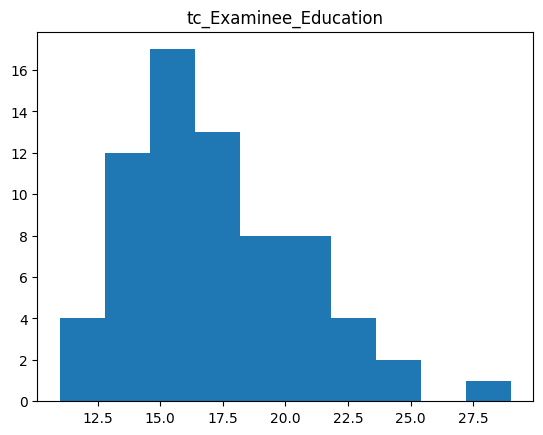

In [35]:
# histograms 
plot_histogram(consent_clean_first_visit)

## Did Not consent to home videos 

In [36]:
# estimate of people approached who did not consent 
# Use date of first home video consent as start date for offering home videos 
# BW participants after that who did not consent to home videos == not consented 

# in raw dataset, but not in raw consent file 
no_consent_all_w_bw_df = bw_df[~bw_df['bw_id'].isin(consent_all_w_bw_df['bw_id'])]
print(f"First date of no consent dataframe: {no_consent_all_w_bw_df['visit_date'].min()}")

first_consent_date = consent_all_w_bw_df['walking_consent_date'].min()
print(f"First date a participant signed consent for home walking videos: {first_consent_date}") 

# filter df of people who did not consent to home walking to only those after the first consent of home video 
no_consent_all_w_bw_df = no_consent_all_w_bw_df.loc[no_consent_all_w_bw_df['visit_date'] >= first_consent_date]
print(f"Firt date of no consent in filtered no consent dataframe: {no_consent_all_w_bw_df['visit_date'].min()}")
print(f"Number of rows in filtered no consent dataframe: {len(no_consent_all_w_bw_df)}")


First date of no consent dataframe: 2022-05-18 00:00:00
First date a participant signed consent for home walking videos: 2023-05-05 00:00:00
Firt date of no consent in filtered no consent dataframe: 2023-05-08 00:00:00
Number of rows in filtered no consent dataframe: 423


### Did not consent to home videos, all/raw 

In [37]:
# in raw bw dataset, but not in raw consent file 
#no_consent_all_w_bw_df = bw_df[~bw_df['bw_id'].isin(consent_all_w_bw_df['bw_id'])]

# all no consent to home videos 
no_consent_ms_first_visit, test_HC = split_MS_HC_first_visit(no_consent_all_w_bw_df, visit_date_col = 'visit_date')
no_consent_ms_dem, no_consent_ms_counts = demographic_summary(no_consent_ms_first_visit)
no_consent_ms_first_visit.to_csv(os.path.join(out_path, 'home_video_no_consent_ms_first_visit_all.csv')) 
no_consent_ms_dem.to_csv(os.path.join(out_path, 'home_video_no_consent_ms_dem_all.csv'))
no_consent_ms_dem

total unique bw_ids in df
347
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS                                                                                 209
HC                                                                                  42
Mild TBI                                                                            16
PD                                                                                   9
bvFTD                                                                                8
nfvPPA                                                                               8
CBS                                                                                  4
sbvFTD                                                                               3
Mild complicated TBI                                                                 3
MCI                                              

,Metric,Statistic
0,N Participants,209
1,"Age (Years), Mean (SD)",55.50 (12.21)
2,"Age (Years), Median (IQR)",55.75 (16.62)
3,"Sex (Female), N (%)",138 (67%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,146 (70%)
6,Hispanic or Latino,14 (7%)
7,Asian,6 (3%)
8,Black Or African American,8 (4%)
9,Other/Unknown/Declined,35 (17%)


### Did not consent to home videos, from clean with all BW data  

In [38]:
# in clean bw dataset, but not in clean consent file  
no_consent_clean_w_bw_df = bw_clean_df[~bw_clean_df['bw_id'].isin(consent_clean_w_bw_df['bw_id'])]
print(f"First date of no consent in clean no consent dataframe: {no_consent_clean_w_bw_df['visit_date'].min()}")
print(f"Number of rows in clean no consent dataframe: {len(no_consent_clean_w_bw_df)}")

# filter df of people who did not consent to home walking to only those after the first consent of home video 
no_consent_clean_w_bw_df = no_consent_clean_w_bw_df.loc[no_consent_clean_w_bw_df['visit_date'] >= first_consent_date]
print(f"First date of no consent in filtered no consent dataframe: {no_consent_clean_w_bw_df['visit_date'].min()}")
print(f"Number of rows in filtered no consent dataframe: {len(no_consent_clean_w_bw_df)}")

First date of no consent in clean no consent dataframe: 2022-09-22 00:00:00
Number of rows in clean no consent dataframe: 171
First date of no consent in filtered no consent dataframe: 2023-05-08 00:00:00
Number of rows in filtered no consent dataframe: 103


In [39]:
# all no consent to home videos 
no_consent_clean_first_visit, test_HC = split_MS_HC_first_visit(no_consent_clean_w_bw_df, visit_date_col = 'visit_date')
no_consent_clean_dem, no_consent_clean_counts = demographic_summary(no_consent_clean_first_visit)
no_consent_clean_first_visit.to_csv(os.path.join(out_path, 'home_video_no_consent_ms_first_visit_clean.csv')) 
no_consent_clean_dem.to_csv(os.path.join(out_path, 'home_video_no_consent_ms_dem_clean.csv'))
no_consent_clean_dem

total unique bw_ids in df
74
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    74
Name: count, dtype: int64
--------------
2.5
2.5
1.5
1.5
4.375
4.5
3.0


,Metric,Statistic
0,N Participants,74
1,"Age (Years), Mean (SD)",50.50 (12.70)
2,"Age (Years), Median (IQR)",48.95 (20.90)
3,"Sex (Female), N (%)",49 (66%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,52 (70%)
6,Hispanic or Latino,9 (12%)
7,Asian,4 (5%)
8,Black Or African American,3 (4%)
9,Other/Unknown/Declined,6 (8%)


## Consented and sent video 

### All Videos sent - raw data frame 
Sent video, not necessarily matched to BW data 

In [40]:
### All Videos 
# Home Videos 
hv_bw_raw_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                analysis_version, 
                                '000_merged_cleaned_data\hv_bw_merged_raw.csv') 

hv_bw_raw_df = pd.read_csv(hv_bw_raw_path, index_col = 0) 

In [41]:
# Home Demographics - All Videos in raw dataset 
raw_home_first_visit, test_HC = split_MS_HC_first_visit(hv_bw_raw_df, visit_date_col = 'visit_date_video')
raw_home_dem, raw_home_counts = demographic_summary(raw_home_first_visit)
raw_home_first_visit.to_csv(os.path.join(out_path, 'home_video_sent_first_visit_all.csv')) 
raw_home_dem.to_csv(os.path.join(out_path, 'home_video_sent_dem_all.csv'))
raw_home_dem

total unique bw_ids in df
38
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    38
Name: count, dtype: int64
--------------
2.5
2.5
2.0
2.0
5.25
5.0
3.0


,Metric,Statistic
0,N Participants,38
1,"Age (Years), Mean (SD)",50.32 (13.86)
2,"Age (Years), Median (IQR)",51.80 (22.53)
3,"Sex (Female), N (%)",31 (82%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,29 (76%)
6,Hispanic or Latino,1 (3%)
7,Asian,3 (8%)
8,Black Or African American,1 (3%)
9,Other/Unknown/Declined,4 (11%)


### All videos in clean df - sent video and had paired BW data 

In [42]:
# Home Videos 
hv_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                analysis_version, 
                                '000_merged_cleaned_data\hv_bw_merged_clean.csv') 

hv_bw_clean_df = pd.read_csv(hv_bw_clean_path, index_col = 0) 

In [43]:
# Home Demographics - All Videos in clean dataset 
clean_home_first_visit, test_HC = split_MS_HC_first_visit(hv_bw_clean_df, visit_date_col = 'visit_date_video')
clean_home_dem, clean_home_counts = demographic_summary(clean_home_first_visit)
clean_home_first_visit.to_csv(os.path.join(out_path, 'home_video_sent_first_visit_clean.csv')) 
clean_home_dem.to_csv(os.path.join(out_path, 'home_video_sent_dem_clean.csv'))

clean_home_dem

total unique bw_ids in df
38
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    38
Name: count, dtype: int64
--------------
2.5
2.5
2.0
2.0
5.25
5.0
3.0


,Metric,Statistic
0,N Participants,38
1,"Age (Years), Mean (SD)",50.32 (13.86)
2,"Age (Years), Median (IQR)",51.80 (22.53)
3,"Sex (Female), N (%)",31 (82%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,29 (76%)
6,Hispanic or Latino,1 (3%)
7,Asian,3 (8%)
8,Black Or African American,1 (3%)
9,Other/Unknown/Declined,4 (11%)


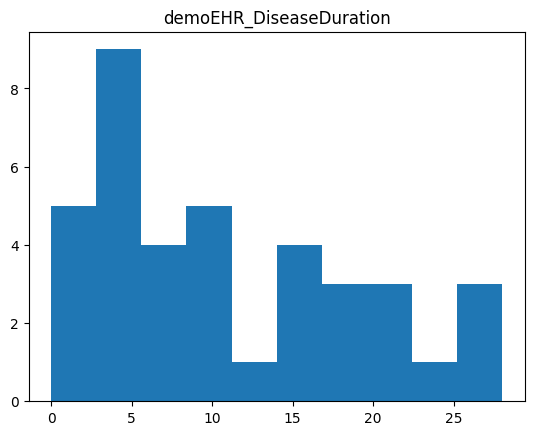

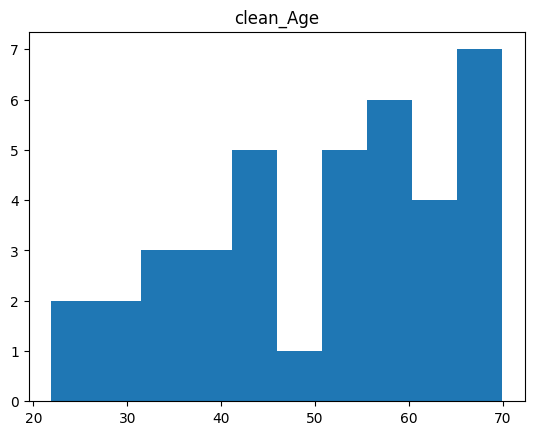

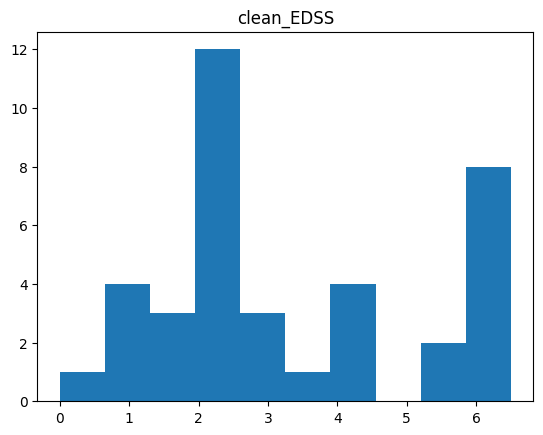

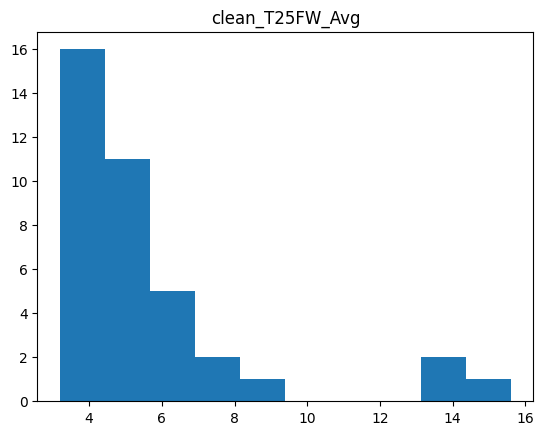

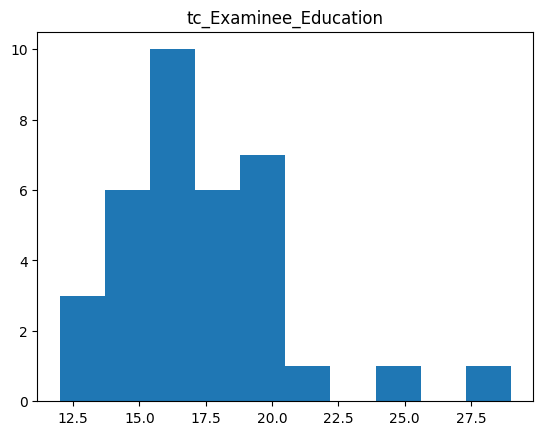

In [44]:
# histograms 
plot_histogram(clean_home_first_visit)

## Consented, but did not send videos 

### Did not send videos, raw/all 

In [45]:
# ids in consent all df, but not in video data 
raw_no_videos_w_bw_df = consent_all_w_bw_df[~consent_all_w_bw_df['bw_id'].isin(hv_bw_raw_df['bw_id'])]

no_video_ms_first_visit, test_HC = split_MS_HC_first_visit(raw_no_videos_w_bw_df, visit_date_col = 'visit_date')
no_video_ms_dem, no_video_ms_counts = demographic_summary(no_video_ms_first_visit)
no_video_ms_first_visit.to_csv(os.path.join(out_path, 'home_video_not_sent_first_visit_all.csv')) 
no_video_ms_dem.to_csv(os.path.join(out_path, 'home_video_not_sent_dem_all.csv'))
no_video_ms_dem

total unique bw_ids in df
35
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    35
Name: count, dtype: int64
--------------
3.0
3.0
1.75
2.0
4.0
4.0
2.0


,Metric,Statistic
0,N Participants,35
1,"Age (Years), Mean (SD)",48.70 (13.31)
2,"Age (Years), Median (IQR)",47.60 (21.45)
3,"Sex (Female), N (%)",24 (69%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,18 (51%)
6,Hispanic or Latino,5 (14%)
7,Asian,3 (9%)
8,Black Or African American,2 (6%)
9,Other/Unknown/Declined,7 (20%)


### Did not send videos, clean with BW data 

In [46]:
clean_no_videos_w_bw_df = consent_clean_w_bw_df[~consent_clean_w_bw_df['bw_id'].isin(hv_bw_clean_df['bw_id'])]

no_video_clean_first_visit, test_HC = split_MS_HC_first_visit(clean_no_videos_w_bw_df, visit_date_col = 'visit_date')
no_video_clean_dem, no_video_clean_counts = demographic_summary(no_video_clean_first_visit)
no_video_clean_first_visit.to_csv(os.path.join(out_path, 'home_video_not_sent_first_visit_clean.csv')) 
no_video_clean_dem.to_csv(os.path.join(out_path, 'home_video_not_sent_dem_clean.csv'))
no_video_clean_dem

total unique bw_ids in df
34
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    34
Name: count, dtype: int64
--------------
2.75
3.0
1.625
1.5
3.875
4.0
2.5


,Metric,Statistic
0,N Participants,34
1,"Age (Years), Mean (SD)",49.06 (13.33)
2,"Age (Years), Median (IQR)",49.00 (21.32)
3,"Sex (Female), N (%)",24 (71%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,17 (50%)
6,Hispanic or Latino,5 (15%)
7,Asian,3 (9%)
8,Black Or African American,2 (6%)
9,Other/Unknown/Declined,7 (21%)


## Videos with walking segment 

### Of all videos sent - # with at least 1 linear walking segment identified, all/raw

In [47]:
hv_bw_raw_wWalking_df = hv_bw_raw_df.loc[hv_bw_raw_df['walking_segmets_n_pose_hv'] > 0]
hv_bw_raw_wWalking_df['walking_segmets_n_pose_hv'].value_counts()

walking_segmets_n_pose_hv
6.0     15
3.0     14
4.0     13
5.0     12
2.0      7
7.0      6
1.0      4
12.0     1
Name: count, dtype: int64

In [48]:
hv_bw_raw_df.loc[pd.isna(hv_bw_raw_df['walking_segmets_n_pose_hv'])]

,video_id_date_name_pose_hv,id_date_pose_hv,task_pose_hv,frames_per_second_pose_hv,total_video_duration_sec_pose_hv,delta_pix_h_rel_median_pose_hv,walking_segmets_n_pose_hv,walking_segments_duration_mean_pose_hv,walking_segments_duration_median_pose_hv,stride_time_num_strides_pose_hv,...,EDSS_same_before_after_MM,demoEHR_Vitals_dateDiff,tc_Examinee_Education,edss_severity_num,edss_severity_cat,t25fw_group_num,t25fw_group_cat,race_ethnicity_clean,ms_dx_condensed,bw_hv_date_diff_days
6,gait_vertical_left_BW-0025_11-28-2023,BW-0025\11-28-2023,gait_vertical_left,30,48.600000,0.02,NaN,NaN,NaN,NaN,...,NaN,-0.472106,25.0,3.0,severe,1.0,under_6,White Non Hispanic,RRMS,-1
8,gait_vertical_right_BW-0025_11-28-2023,BW-0025\11-28-2023,gait_vertical_right,30,58.766667,0.08,NaN,NaN,NaN,NaN,...,NaN,-0.472106,25.0,3.0,severe,1.0,under_6,White Non Hispanic,RRMS,-1
21,gait_vertical_left_BW-0126_05-05-2023,BW-0126\05-05-2023,gait_vertical_left,30,34.033333,0.27,NaN,NaN,NaN,NaN,...,NaN,-0.536875,22.0,1.0,mild,1.0,under_6,Other/Unknown/Declined,RRMS,29
27,gait_vertical_left_BW-0182_2-22-2024,BW-0182\2-22-2024,gait_vertical_left,51,23.784314,0.30,NaN,NaN,NaN,NaN,...,NaN,-0.567396,17.0,1.0,mild,1.0,under_6,White Non Hispanic,RRMS,1
28,gait_vertical_right_BW-0182_2-22-2024,BW-0182\2-22-2024,gait_vertical_right,51,23.823529,0.29,NaN,NaN,NaN,NaN,...,NaN,-0.567396,17.0,1.0,mild,1.0,under_6,White Non Hispanic,RRMS,1
39,gait_vertical_left_BW-0230_09-19-2023,BW-0230\09-19-2023,gait_vertical_left,30,53.466667,0.03,NaN,NaN,NaN,NaN,...,NaN,-0.463947,19.0,1.0,mild,1.0,under_6,White Non Hispanic,RRMS,0
40,gait_vertical_left_BW-0232_10-09-2023,BW-0232\10-09-2023,gait_vertical_left,10,22.600000,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.522859,14.0,2.0,moderate,2.0,6_to_8,Asian,RRMS,5
41,gait_vertical_right_BW-0232_10-09-2023,BW-0232\10-09-2023,gait_vertical_right,10,28.700000,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.522859,14.0,2.0,moderate,2.0,6_to_8,Asian,RRMS,5
42,gait_vertical_right_2_BW-0232_10-09-2023,BW-0232\10-09-2023,gait_vertical_right_2,10,26.100000,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.522859,14.0,2.0,moderate,2.0,6_to_8,Asian,RRMS,5
43,gait_vertical_left_BW-0237_10-09-2023,BW-0237\10-09-2023,gait_vertical_left,30,32.833333,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.553484,14.0,2.0,moderate,1.0,under_6,White Non Hispanic,RRMS,4


In [49]:
# demographics and counts 
raw_home_wWalking_first, test_HC = split_MS_HC_first_visit(hv_bw_raw_wWalking_df, visit_date_col = 'visit_date_video')
raw_home_wWalking_dem, raw_home_wWalking_counts = demographic_summary(raw_home_wWalking_first)
raw_home_wWalking_first.to_csv(os.path.join(out_path, 'home_wWalking_first_visit_all.csv')) 
raw_home_wWalking_dem.to_csv(os.path.join(out_path, 'home_wWalking_dem_all.csv'))
raw_home_wWalking_dem

total unique bw_ids in df
33
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    33
Name: count, dtype: int64
--------------
2.5
2.5
2.0
2.0
5.5
5.5
3.5


,Metric,Statistic
0,N Participants,33
1,"Age (Years), Mean (SD)",50.58 (14.79)
2,"Age (Years), Median (IQR)",55.00 (25.90)
3,"Sex (Female), N (%)",27 (82%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,26 (79%)
6,Hispanic or Latino,1 (3%)
7,Asian,2 (6%)
8,Black Or African American,0 (0%)
9,Other/Unknown/Declined,4 (12%)


### Home videos with walking segment identified and paired BW data, clean

In [50]:
hv_bw_clean_wWalking_df = hv_bw_clean_df.loc[hv_bw_clean_df['walking_segmets_n_pose_hv'] > 0]
hv_bw_clean_wWalking_df['walking_segmets_n_pose_hv'].value_counts()

walking_segmets_n_pose_hv
6.0     15
3.0     14
4.0     13
5.0     12
2.0      7
7.0      6
1.0      4
12.0     1
Name: count, dtype: int64

In [51]:
# demographics and counts 
clean_home_wWalking_first, test_HC = split_MS_HC_first_visit(hv_bw_clean_wWalking_df, visit_date_col = 'visit_date_video')
clean_home_wWalking_dem, clean_home_wWalking_counts = demographic_summary(clean_home_wWalking_first)
clean_home_wWalking_first.to_csv(os.path.join(out_path, 'home_wWalking_first_visit_clean.csv')) 
clean_home_wWalking_dem.to_csv(os.path.join(out_path, 'home_wWalking_dem_clean.csv'))
clean_home_wWalking_dem

total unique bw_ids in df
33
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    33
Name: count, dtype: int64
--------------
2.5
2.5
2.0
2.0
5.5
5.5
3.5


,Metric,Statistic
0,N Participants,33
1,"Age (Years), Mean (SD)",50.58 (14.79)
2,"Age (Years), Median (IQR)",55.00 (25.90)
3,"Sex (Female), N (%)",27 (82%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,26 (79%)
6,Hispanic or Latino,1 (3%)
7,Asian,2 (6%)
8,Black Or African American,0 (0%)
9,Other/Unknown/Declined,4 (12%)


## Sent videos, but no linear walking segment identified 

In [52]:
clean_no_walking_df = hv_bw_clean_df[~hv_bw_clean_df['bw_id'].isin(hv_bw_clean_wWalking_df['bw_id'])]

no_walking_first_visit_clean, test_HC = split_MS_HC_first_visit(clean_no_walking_df, visit_date_col = 'visit_date')
no_walking_clean_dem, no_walking_ms_counts = demographic_summary(no_walking_first_visit_clean)
no_walking_first_visit_clean.to_csv(os.path.join(out_path, 'home_video_no_walking_first_visit_clean.csv')) 
no_walking_clean_dem.to_csv(os.path.join(out_path, 'home_video_no_walking_dem_clean.csv'))
no_walking_clean_dem

total unique bw_ids in df
5
--------------
any duplicate bw_ids in first visit df?
0
--------------
df_first_visit demographic diagnosis counts
demographic_diagnosis
MS    5
Name: count, dtype: int64
--------------
2.5
2.5
2.0
2.0
3.0
3.0
1.0


,Metric,Statistic
0,N Participants,5
1,"Age (Years), Mean (SD)",48.60 (4.89)
2,"Age (Years), Median (IQR)",47.40 (5.80)
3,"Sex (Female), N (%)",4 (80%)
4,"Race/Ethnicity, N (%)",NaN
5,White Non Hispanic,3 (60%)
6,Hispanic or Latino,0 (0%)
7,Asian,1 (20%)
8,Black Or African American,1 (20%)
9,Other/Unknown/Declined,0 (0%)
